# Raw Data exploration

## Set-up and data import

In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="whitegrid")
import re
import text_to_x as ttx

You should consider upgrading via the '/Users/anitakurm/anaconda3/envs/text_to_x/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
data = pd.read_csv("data/china-user-tweets-2020-08-06.csv")

## Getting to know the dataframe

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31931 entries, 0 to 31930
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           31931 non-null  int64  
 1   time                         31931 non-null  int64  
 2   created_at                   31931 non-null  object 
 3   from_user_name               31931 non-null  object 
 4   text                         31931 non-null  object 
 5   filter_level                 31931 non-null  object 
 6   possibly_sensitive           26113 non-null  float64
 7   withheld_copyright           0 non-null      float64
 8   withheld_scope               0 non-null      float64
 9   truncated                    0 non-null      float64
 10  retweet_count                31931 non-null  int64  
 11  favorite_count               31931 non-null  int64  
 12  lang                         31931 non-null  object 
 13  to_user_name    

In [26]:
# drop empty columns
data_clean = data.dropna(axis=1, how='all')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31931 entries, 0 to 31930
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           31931 non-null  int64  
 1   time                         31931 non-null  int64  
 2   created_at                   31931 non-null  object 
 3   from_user_name               31931 non-null  object 
 4   text                         31931 non-null  object 
 5   filter_level                 31931 non-null  object 
 6   possibly_sensitive           26113 non-null  float64
 7   retweet_count                31931 non-null  int64  
 8   favorite_count               31931 non-null  int64  
 9   lang                         31931 non-null  object 
 10  to_user_name                 1752 non-null   object 
 11  in_reply_to_status_id        1703 non-null   float64
 12  quoted_status_id             1761 non-null   float64
 13  source          

In [27]:
data_clean.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,retweet_count,favorite_count,lang,...,media_id,media_urls,media_type,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags
0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,0,0,en,...,1262697877803077632,https://pbs.twimg.com/media/EYYBB6EXkAAyrEA.jpg,photo,281,304,635,357,fit,WHO,NaN
1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,0,0,en,...,1262704822089912321,https://pbs.twimg.com/media/EYYHWHjXkAEgjF_.jpg,photo,269,292,512,341,fit,NaN,NaN
2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,0,0,en,...,1262747210246049794,https://pbs.twimg.com/media/EYYt5bvU0AI_Ivr.jpg,photo,250,273,2048,1366,fit,NaN,StrongerTogether
3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,0,0,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN
4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,0,0,en,...,1262742771380543490,https://pbs.twimg.com/media/EYYp3DrUYAIolQR.jpg,photo,77,100,1080,595,fit,SpokespersonCHN,NaN


In [43]:
# extract interesting columns
print(data_clean.columns)
cool_columns = ["id","created_at", "from_user_name", "text", "lang",
                "possibly_sensitive", "retweet_count",
                'favorite_count', 'to_user_name', 'in_reply_to_status_id',
                'from_user_verified', 'from_user_description',  
                'from_user_followercount','from_user_friendcount', 
                'from_user_favourites_count', 'media_type', 'mentions', 
                'hashtags']
data_clean2 = data_clean[cool_columns]
data_clean2.head()

Index(['id', 'created_at', 'from_user_name', 'text', 'lang', 'filter_level',
       'possibly_sensitive', 'retweet_count', 'favorite_count', 'to_user_name',
       'in_reply_to_status_id', 'from_user_verified', 'from_user_description',
       'from_user_followercount', 'from_user_friendcount',
       'from_user_favourites_count', 'media_type', 'mentions', 'hashtags'],
      dtype='object')


,id,created_at,from_user_name,text,lang,possibly_sensitive,retweet_count,favorite_count,to_user_name,in_reply_to_status_id,from_user_verified,from_user_description,from_user_followercount,from_user_friendcount,from_user_favourites_count,media_type,mentions,hashtags
0,1262699470946516992,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,en,0.0,0,0,NaN,NaN,1,Mission of the People's Republic of China to t...,14658,1842,2755,photo,WHO,NaN
1,1262705175489363968,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,en,0.0,0,0,NaN,NaN,1,Mission of the People's Republic of China to t...,14659,1842,2755,photo,NaN,NaN
2,1262747333747343366,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,en,0.0,0,0,NaN,NaN,1,Mission of the People's Republic of China to t...,14665,1842,2755,photo,NaN,StrongerTogether
3,1262753525655719938,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,en,0.0,0,0,NaN,NaN,1,"Spokesman & DDG, Information Department, Forei...",621491,179167,121496,NaN,SpokespersonCHN,NaN
4,1262753542101581830,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,en,0.0,0,0,NaN,NaN,1,"Spokesman & DDG, Information Department, Forei...",621491,179167,121497,photo,SpokespersonCHN,NaN


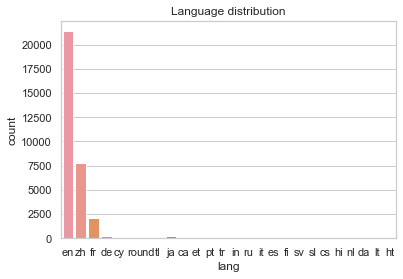

In [44]:
ax = sns.countplot(x="lang", data=data_clean2).set_title('Language distribution')

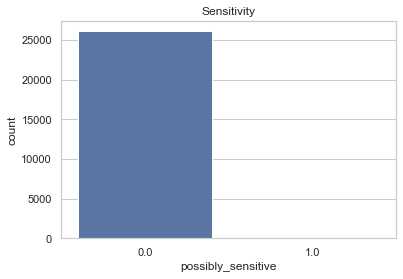

In [45]:
ax = sns.countplot(x="possibly_sensitive", data=data_clean2).set_title('Sensitivity')

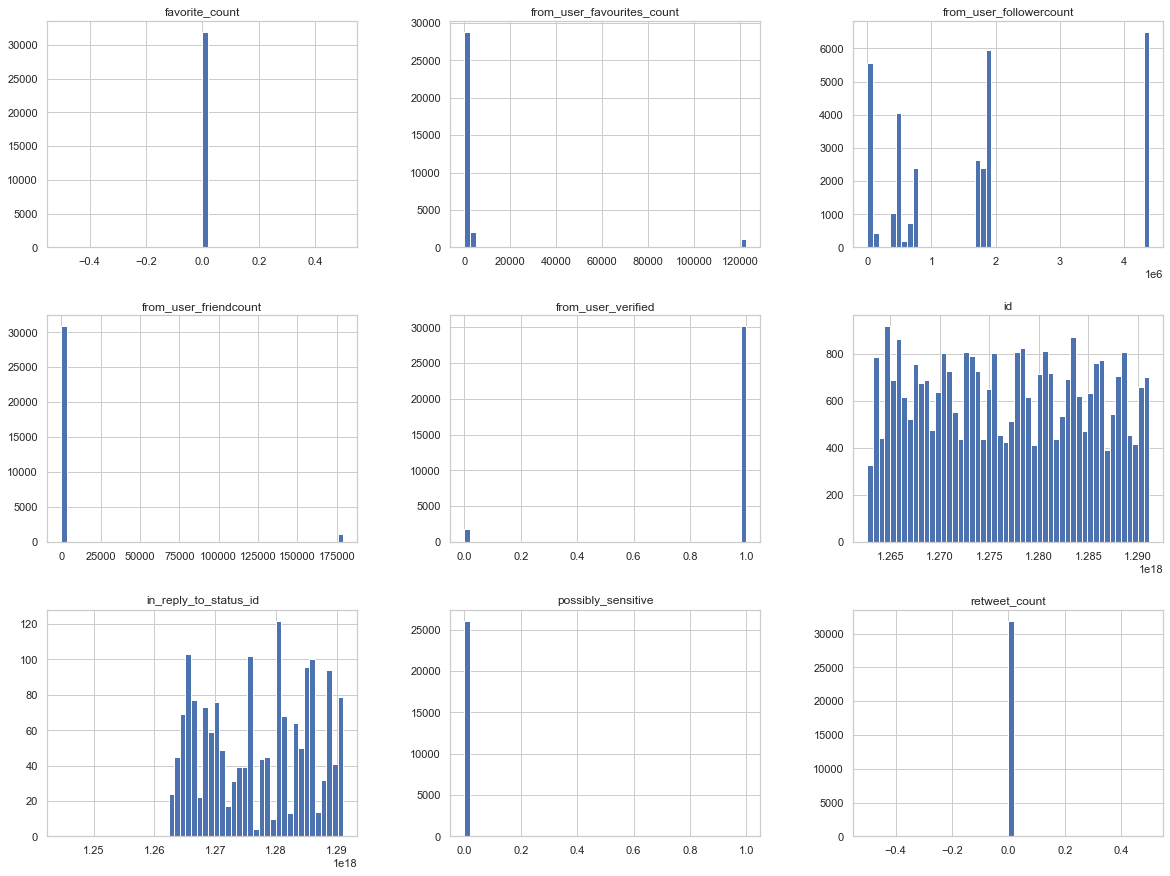

In [48]:
data_clean2.hist(bins=50, figsize=(20,15))
plt.show()

## Text analysis

### Preprocessing using TextToX pipeline from covid_19 workflow

In [20]:
"""
This script performs tokenization, extraction of lemmas, pos-tagging
and ner-tagging on Data Commando Twitter data.
"""
import os
import time
import re
#import ndjson
import multiprocessing as mp
from functools import partial
import pandas as pd
#import text_to_x as ttx
from text_to_x.utils import detect_lang_polyglot, add_def_args
#stopword = stopwords.words(‘english’)

def chunks(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

def to_ndjson(df):
    if df.empty:
        return []
    res = []
    for i, row in df.iterrows():
        lang = row['lang']
        d = {'created_at': row['created_at'],
             'id': row['id'],
             'id_str': str(row['id']),
             'text': row['text'],
             'retweet_count': row['retweet_count'],
             'favorite_count': row['favorite_count'],
             'lang': lang,
             "follower_count": row['from_user_followercount']}
        res.append(d)
    return res


def preprocess(lang, data):
    lang_posts = [d for d in data if d['lang'] == lang]
    # make placeholders to accumulate processing time
    time_text_extract = 0
    time_stanza = 0
    skipped_counter = 0
    chunk_n = 0
    # chunking - OUTER to avoid memory errors
    chunk_id = 0
    max_length = 20000
    chunked_posts = chunks(lang_posts, max_length)
    big_res = []
    for ch in chunked_posts:
        res = []
        ch = [post for post in ch]
        chunk_id += 1

        # chunking - INNER to handle stanza errors
        chunk_size = 500
        chunked_chunk = chunks(ch, chunk_size)
        for c in chunked_chunk:
            start = time.time()
            chunk_n += 1
            c = [post for post in c]
            texts = [post['text'] for post in c]

            time_text_extract_c = time.time() - start
            time_text_extract += time_text_extract_c

            # preprocess and tokenize using ttt object defined earlier
            start = time.time()
            ttt = ttx.TextToTokens(lang=lang,
                                   tokenize="stanza",
                                   lemmatize="stanza",
                                   pos="stanza",
                                   depparse="stanza",
                                   ner="stanza",
                                   silent=False)
            try:
                ttt.texts_to_tokens(texts)
            except:
                skipped_counter += 1
                continue
            ttt.twitter_format()
            dfs = ttt.get_token_dfs()
            for i, post in enumerate(c):
                post['tokens'] = dfs[i].to_dict()
            res += c
            time_stanza_c = time.time() - start
            time_stanza += time_stanza_c
        
        big_res += res
    return big_res
    
    
    
    #no_url = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    # lower = no_url.lower()
    # word_tokens = nltk.word_tokenize(lower)
    # no_stop = [word for word in word_tokens if word not in stopword]
    #dfs = ttt.texts_to_tokens(no_url)
    #ttt.twitter_format()
    #dfs = ttt.get_token_dfs()
    #return 

In [21]:
df = to_ndjson(data_clean2)
english_data = preprocess('en', df)

2020-08-08 09:52:08 INFO: Downloading default packages for language: en (English)...
2020-08-08 09:53:10 INFO: Finished downloading models and saved to /Users/anitakurm/stanza_resources.
2020-08-08 09:53:10 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 09:53:10 INFO: Use device: cpu
2020-08-08 09:53:10 INFO: Loading: tokenize
2020-08-08 09:53:10 INFO: Loading: pos
2020-08-08 09:53:11 INFO: Loading: lemma
2020-08-08 09:53:11 INFO: Loading: depparse
2020-08-08 09:53:12 INFO: Loading: ner
2020-08-08 09:53:13 INFO: Done loading processors!
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/text_to_x/TextToTokens.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

2020-08-08 10:50:46 INFO: Use device: cpu
2020-08-08 10:50:46 INFO: Loading: tokenize
2020-08-08 10:50:46 INFO: Loading: pos
2020-08-08 10:50:47 INFO: Loading: lemma
2020-08-08 10:50:47 INFO: Loading: depparse
2020-08-08 10:50:48 INFO: Loading: ner
2020-08-08 10:50:48 INFO: Done loading processors!
2020-08-08 10:55:34 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 10:55:34 INFO: Use device: cpu
2020-08-08 10:55:34 INFO: Loading: tokenize
2020-08-08 10:55:34 INFO: Loading: pos
2020-08-08 10:55:36 INFO: Loading: lemma
2020-08-08 10:55:36 INFO: Loading: depparse
2020-08-08 10:55:37 INFO: Loading: ner
2020-08-08 10:55:38 INFO: Done loading processors!
2020-08-08 11:00:24 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | e

2020-08-08 12:00:32 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 12:00:32 INFO: Use device: cpu
2020-08-08 12:00:32 INFO: Loading: tokenize
2020-08-08 12:00:32 INFO: Loading: pos
2020-08-08 12:00:33 INFO: Loading: lemma
2020-08-08 12:00:33 INFO: Loading: depparse
2020-08-08 12:00:35 INFO: Loading: ner
2020-08-08 12:00:35 INFO: Done loading processors!
2020-08-08 12:05:07 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 12:05:07 INFO: Use device: cpu
2020-08-08 12:05:07 INFO: Loading: tokenize
2020-08-08 12:05:07 INFO: Loading: pos
2020-08-08 12:05:08 INFO: Loading: lemma
2020-08-08 12:05:0

2020-08-08 12:59:09 INFO: Use device: cpu
2020-08-08 12:59:09 INFO: Loading: tokenize
2020-08-08 12:59:09 INFO: Loading: pos
2020-08-08 12:59:10 INFO: Loading: lemma
2020-08-08 12:59:10 INFO: Loading: depparse
2020-08-08 12:59:11 INFO: Loading: ner
2020-08-08 12:59:11 INFO: Done loading processors!
2020-08-08 13:03:31 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 13:03:31 INFO: Use device: cpu
2020-08-08 13:03:31 INFO: Loading: tokenize
2020-08-08 13:03:31 INFO: Loading: pos
2020-08-08 13:03:32 INFO: Loading: lemma
2020-08-08 13:03:32 INFO: Loading: depparse
2020-08-08 13:03:33 INFO: Loading: ner
2020-08-08 13:03:34 INFO: Done loading processors!
2020-08-08 13:08:03 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | e

In [23]:
en_df = pd.DataFrame(english_data)
en_df.head()

,created_at,id,id_str,text,retweet_count,favorite_count,lang,follower_count,tokens
0,2020-05-19 10:59:48,1262699470946516992,1262699470946516992,All parties have reached consensus on a draft ...,0,0,en,14658,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
1,2020-05-19 11:22:28,1262705175489363968,1262705175489363968,China's railway system is expected to reach 14...,0,0,en,14659,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
2,2020-05-19 14:09:59,1262747333747343366,1262747333747343366,China has exported over 50 billion masks since...,0,0,en,14665,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
3,2020-05-19 14:34:35,1262753525655719938,1262753525655719938,RT @SpokespersonCHN: Not the first time to bas...,0,0,en,621491,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
4,2020-05-19 14:34:39,1262753542101581830,1262753542101581830,RT @SpokespersonCHN: That what does not kill y...,0,0,en,621491,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."


In [25]:
# save processed df
en_df.to_csv('data/english_preprocessed.csv')


In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%pip install yellowbrick
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer

     |████████████████████████████████| 263 kB 1.6 MB/s eta 0:00:01
You should consider upgrading via the '/Users/anitakurm/anaconda3/envs/text_to_x/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
en_df['tokens'].head()

0    {'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...
1    {'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...
2    {'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...
3    {'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...
4    {'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...
Name: tokens, dtype: object

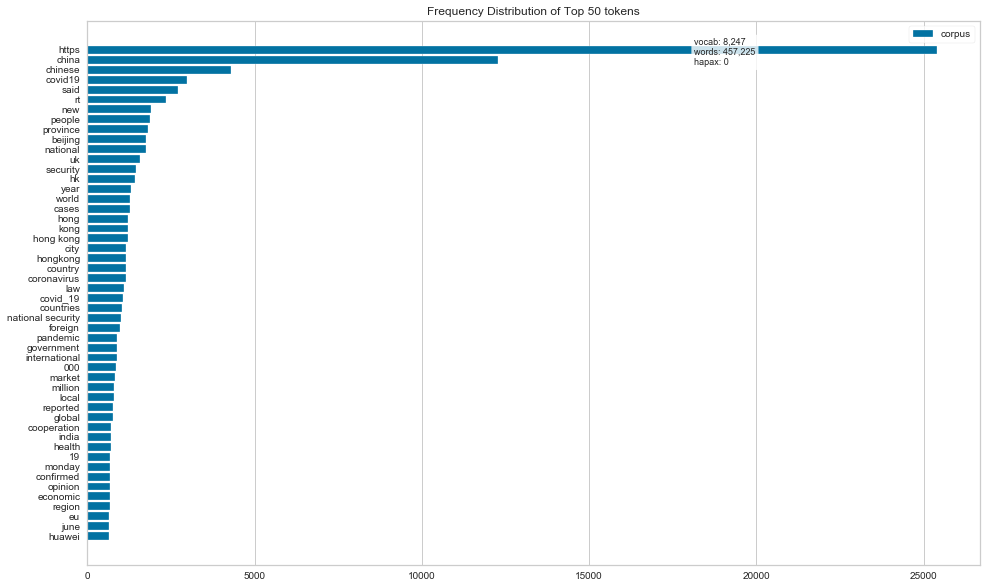

In [28]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(en_df['text'].dropna())
features = vect.get_feature_names()

plt.figure(figsize=(16,10))
visualiser = FreqDistVisualizer(features=features)
visualiser.fit(docs)
visualiser.poof()
plt.show()

2020-08-09 00:42:10 WARNING: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-08-09 00:42:10 WARNING: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-08-09 00:42:10 WARNING: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-08-09 00:42:10 WARNING: 'c' argument looks like a single nu

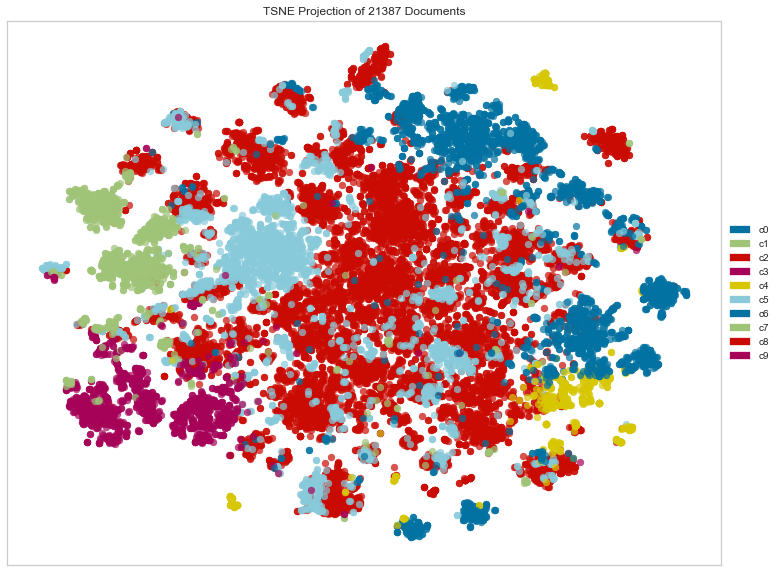

In [30]:
from sklearn.cluster import KMeans

real_clean = en_df['text']
corpus_clean = list(real_clean.values)
tfidf = TfidfVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
docs_clean = tfidf.fit_transform(corpus_clean)
clusters = KMeans(n_clusters=10)
clusters.fit(docs_clean)
plt.figure(figsize=(16,10))
tsne = TSNEVisualizer()
tsne.fit(docs_clean, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()
plt.show()

In [40]:
# pyLDAvis
import gensim
import pyLDAvis.gensim
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models, similarities


stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join([ch for ch in stop_free if ch not in exclude])
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


# some additional pre-processing is needed, so I'll use the original tweet-text column from the sample instead
sample_text = en_df['text']
state_text = list(sample_text.values)

text_clean = [clean(doc).split() for doc in state_text]
dictionary = corpora.Dictionary(text_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_clean]

# I'm keeping the number of topics small so that they would be easier to discern
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = 5, id2word = dictionary, passes=100)

tfidf = models.TfidfModel(doc_term_matrix)
doc_tfidf = tfidf[doc_term_matrix]
doc_lda = ldamodel[doc_tfidf]

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(ldamodel, doc_lda, dictionary, mds='tsne', sort_topics=True)
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  45.918861
2       51.163364 -159.968018       2        1  23.894121
0      -73.144554   21.523815       3        1  10.069036
3      -66.410133 -110.606438       4        1  10.059395
1       54.417324   12.443444       5        1  10.058584, topic_info=         Term        Freq       Total Category  logprob  loglift
159   covid19  124.000000  124.000000  Default  30.0000  30.0000
31      china  507.000000  507.000000  Default  29.0000  29.0000
193  province   47.000000   47.000000  Default  28.0000  28.0000
296  security   62.000000   62.000000  Default  27.0000  27.0000
288        hk   58.000000   58.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
83         rt    8.033511  144.886963   Topic5  -5.5902  -0.5956
210   chinese    7.914520  213.607605   Topic5  -5.6051  -0.9987
605       one    5.413707   37.904972   Topic5  -5.9849   0.3506
85       time    5.169626   29.601547   Topic5  -6.0310   0.5517
178   central    4.818726   22.168941   Topic5  -6.1013   0.7706

[304 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
53         3  0.916046          1
671        2  0.126389  according
671        3  0.884723  according
1205       3  0.920877       acid
1609       2  0.946039        act
...      ...       ...        ...
4960       2  1.011793         香港
2848       4  0.891214   🇧🇷brazil
19427      4  1.056951    🇮🇳india
2562       4  1.108071   🇷🇺russia
2849       4  0.904827       🇺🇸us

[392 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 2])